In [1]:
import sys
sys.path.append('..')

from classes.NetworkXGraph import Graph

In [2]:
# Building graph

    # source: https://graphchallenge.mit.edu/data-sets
    # file_source: https://graphchallenge.s3.amazonaws.com/snap/as20000102/as20000102_adj.tsv
    # file_format: Adjacency TSV (Tab-Separated Values)
        # <dataset-name>_adj.tsv
        # (Row, Col, Value) tuple describing the adjacency matrix of the graph in tab separated format.
        # Adjacency matrix is of size Num_vertices x Num_vertices
    # file: as20000102_adj.tsv (Autonomous Systems graph from January 02 2000)
    # num of nodes:      6.474
    # num of edges:     25.144
    # num of triangles:  6.584

g = Graph()
g.build_from_tsv('../datasets/as20000102_adj.tsv', data=(('ajd_value',float),), show_info=True)

Number of lines read from TSV file: 25144
Name: 
Type: Graph
Number of nodes: 6474
Number of edges: 12572
Average degree:   3.8838
Number of triangles:  6584
Clustering coefficient:  0.2522224351161442
Diameter:  9
Radius:  5
elapsed time in seconds: 740.589194


In [3]:
# Using samples to build graphs and to calculate

g.get_analisys_from_samples(['clustering_coefficient', 'diameter', 'radius'])

----------------------------------------
Analysing by random edge sample strategy
----------------------------------------
Elapsed time for 1005 edges: 1.361700, total nodes processed: 1163
Elapsed time for 2010 edges: 6.902245, total nodes processed: 1959
Elapsed time for 3015 edges: 18.145671, total nodes processed: 2643
Elapsed time for 4020 edges: 31.419876, total nodes processed: 3190
Elapsed time for 5025 edges: 46.379099, total nodes processed: 3670
Elapsed time for 6030 edges: 65.131546, total nodes processed: 4085
Elapsed time for 7035 edges: 79.360651, total nodes processed: 4442
Elapsed time for 8040 edges: 95.725458, total nodes processed: 4777
Elapsed time for 9045 edges: 111.390027, total nodes processed: 5034
Elapsed time for 10050 edges: 124.127192, total nodes processed: 5256
Elapsed time for 11055 edges: 139.575336, total nodes processed: 5437
Elapsed time for 12060 edges: 152.735544, total nodes processed: 5620
Elapsed time for 13065 edges: 171.753941, total nodes pr

Elapsed time for 17028 steps: 110.793594, total nodes processed: 4230
Elapsed time for 17286 steps: 110.990258, total nodes processed: 4250
Elapsed time for 17544 steps: 112.891822, total nodes processed: 4286
Elapsed time for 17802 steps: 114.255061, total nodes processed: 4316
Elapsed time for 18060 steps: 114.326553, total nodes processed: 4341
Elapsed time for 18318 steps: 116.233188, total nodes processed: 4368
Elapsed time for 18576 steps: 119.117698, total nodes processed: 4395
Elapsed time for 18834 steps: 119.630288, total nodes processed: 4419
Elapsed time for 19092 steps: 123.485547, total nodes processed: 4445
Elapsed time for 19350 steps: 124.053234, total nodes processed: 4475
Elapsed time for 19608 steps: 125.802818, total nodes processed: 4512
Elapsed time for 19866 steps: 127.173092, total nodes processed: 4546
Elapsed time for 20124 steps: 133.146516, total nodes processed: 4567
Elapsed time for 20382 steps: 129.473227, total nodes processed: 4598
Elapsed time for 206

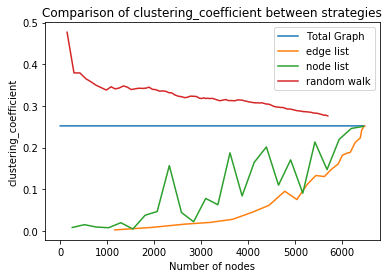

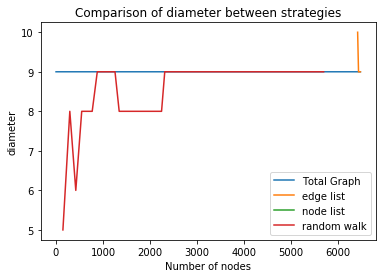

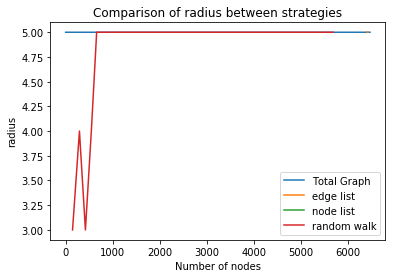

In [4]:
# Ploting results

g.plot_analisys(['clustering_coefficient', 'diameter', 'radius'])